# Data Preprocessing

## 1. Data Encoding

머신러닝 알고리즘은 문자열을 입력받지 않으므로 모든 문자열로 이루어진 데이터를 숫자로 변환해야한다.

### 1.1 Lable Encoding

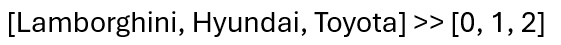

일종의 숫자값으로 부여가 됨으로서 의도치 않게 의미를 부여할 수 있음. 현대가 람보보다 크다

In [2]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', 'Fridge', 'microwave oven', 'Computer', 'Fan', 'Fan', 'Mixer', 'Mixer']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('Label Encoding Result:',labels)

Label Encoding Result: [4 2 5 0 1 1 3 3]


In [6]:
print('Encoding Class:',encoder.classes_)

Encoding Class: ['Computer' 'Fan' 'Fridge' 'Mixer' 'TV' 'microwave oven']


In [7]:
print('Original Class:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

Original Class: ['TV' 'microwave oven' 'Fridge' 'Computer' 'Fan' 'Fan' 'Mixer' 'Mixer']


### 1.2 One - Hot Encoding

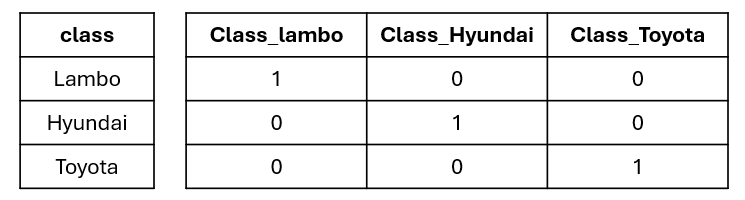

In [16]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', 'Fridge', 'microwave oven', 'Computer', 'Fan', 'Fan', 'Mixer', 'Mixer']

# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)
print(items)

[['TV']
 ['Fridge']
 ['microwave oven']
 ['Computer']
 ['Fan']
 ['Fan']
 ['Mixer']
 ['Mixer']]


reshape(1, -1) 하면 이상하게 출력됨

In [17]:
# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

print(oh_labels)
# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('One-Hot-Encogind Data')
print(oh_labels.toarray())
print('Shape of One-Hot-Encoding')
print(oh_labels.shape)

  (0, 4)	1.0
  (1, 2)	1.0
  (2, 5)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
One-Hot-Encogind Data
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
Shape of One-Hot-Encoding
(8, 6)


간단하게 하려면 pandas의 get_dummies()를 사용하라

In [19]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', 'Fridge', 'microwave oven', 'Computer', 'Fan', 'Fan', 'Mixer', 'Mixer']})
df

,item
0,TV
1,Fridge
2,microwave oven
3,Computer
4,Fan
5,Fan
6,Mixer
7,Mixer


In [22]:
ohe_df = pd.get_dummies(df)
display(ohe_df)
# 0, 1로 하려면 .astype(int)로 해주어야한다.

,item_Computer,item_Fan,item_Fridge,item_Mixer,item_TV,item_microwave oven
0,False,False,False,False,True,False
1,False,False,True,False,False,False
2,False,False,False,False,False,True
3,True,False,False,False,False,False
4,False,True,False,False,False,False
5,False,True,False,False,False,False
6,False,False,False,True,False,False
7,False,False,False,True,False,False


### Feature Scaling and Normalization

피처들은 값의 척도가 다르다. 온도는 0도, -10도, +30도가 될 수 있고 습도는 10퍼 20퍼... 그런데 온도가 90도 넘게 될 일은 없다.
연수입은 1억이 될 수도 있다.

- 표준화는 데이터의 피쳐 각각이 평균이 0으고 분산이 1인 가우시안 정규분포로 변환
- 정규화는 서로 다른 피쳐의 크기를 통일하기 위해 크기를 변환해준다 (0에서 1사이의 값으로 변환)

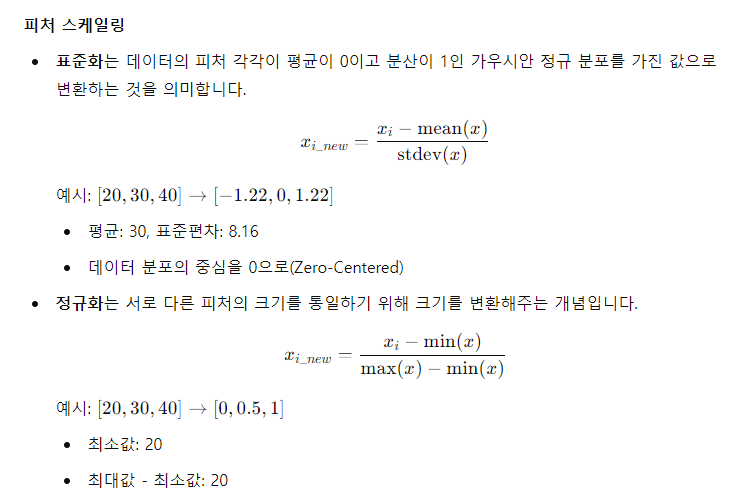

질문 : 데이터 전처리 - 스케일링 - 01 강의 1분47초에서

표준화로 데이터의 피처 각각이 평균이 0 이고 분산이 1인 가우시안 정규분포로 바꿔준다고 했는데
 

원래 데이터가 정규분포를 가졌다면 xi_new (표준화 식)식 으로 평균이 0 이고 분산이 1인 정규분포를 도출할 수 있지만 애초에 정규분포를 이루지 않는 데이터의 경우는 해당 식을 적용한다고 해서 정규분포가 되지 않을 텐데 이런 경우는 어떻게 해서 정규분포로 만든다는

답변 : Standard Scaler(z score 변환)은 정규 분포 형태의 데이터들을 표준 정규 분포 형태로 만들어 줍니다. 이때 Standard Scaler는 기존 데이터 분포를 유지하면서 평균이 -1 ~ 1 사이에 대부분의 값이 들어올 수 있도록 변환을 해줍니다.

말씀하신대로 기존 데이터가 정규 분포 형태가 아닌 경우 Standard Scaler가 이를 정규 분포형태로 바꿔주지는 않습니다. 다만 정규 분포가 아니더라도 Standard Scaler는 기존의 데이터 분포를 어느정도 유지하면서도 평균이 0에 가깝게 유지할 수 있도록 데이터 변환이 됩니다.

Standard Scaler로 변환할 때 정규 분포이냐, 아니냐 관점보다는 서로 다른 데이터 세트들을 동일한 잣대로 변경할 수 있는 규칙을 Z-score 변환으로 정했다는 점에 더 촛점을 맞추셨으면 

결론 : standard scaler는 데이터의 분포모양을 바꾸는게 아니라 평균과 분산을 바꾸어준다. 중요한건 정규분포가 아니라 데이터를 평균 0, 표준편차 1로 변환하여 스케일을 조정하는 것합니다. 것일까요?

- StandardScaler

In [32]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)

In [33]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
print('Mean of Features')
print(iris_df.mean())
print('\nVariation of Features')
print(iris_df.var())

Mean of Features
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Variation of Features
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit을 할떄 주어진 데이터 프레임의 각 피쳐(열)에 대해 평균과 표준편차를 구한다.
# scaler내부에 피쳐별로 계산된 평균과 표준편차를 저장한다. 
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

In [41]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


만일, scaler.transform()에 iris_df가 아닌 다른 데이터프레임이 들어가면, scaler 객체가 fit 메서드로 계산한 평균과 표준편차를 사용하여 새로운 데이터프레임의 피처들을 동일한 방식으로 변환(표준화)한다.

이때, 새로운 데이터는 특징의 개수와 순서가 동일해야한다
데이터 분포가 다르면 극단적인 값이 나올 수 있다.

In [45]:
print('Mean of Features')
print(iris_df_scaled.mean())
print('\nVariation of Features')
print(iris_df_scaled.var())

Mean of Features
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

Variation of Features
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- MinMaxScaler

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print('min of features')
print(iris_df_scaled.min())
print('\nmax of features')
print(iris_df_scaled.max())

min of features
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

max of features
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항.

In [48]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [50]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [51]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


모델이 0~10 을 가지고 학습하는데 test_data와 train_data의 변환 스케일이 다르다.
train_array로 fit하면 그걸로 계속 가지고 가야한다.